In [114]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import zipfile
import os
from collections import defaultdict
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_rows", 1000) 
pd.set_option("display.max_colwidth", 1000) 
pd.set_option("display.max_columns", 1000) 

## Loading the data

In [3]:
path = 'D:\Downloads'

In [4]:
z = zipfile.ZipFile('%s/lending-club-loan-data.zip' %path)
z.namelist()


['LCDataDictionary.xlsx', 'database.sqlite', 'loan.csv']

In [5]:
df = pd.read_csv(z.open('loan.csv'), low_memory=False)

## Data exploration

#### Let's take a look at the data

In [6]:
df.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011  Fully Paid          n   

                                                                    url  \
0  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   

                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78           5000.0         861.07                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Jan-2015           171.62   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0          NaN           Jan-2016                         0.0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN          1.0       INDIVIDUAL   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN           NaN      NaN          NaN   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
0          NaN         NaN       NaN               NaN     NaN          NaN   

   inq_last_12m  
0           NaN

In [7]:
df_dict = pd.read_excel(z.open('LCDataDictionary.xlsx')) 
df_dict.sort_values('LoanStatNew')

LoanStatNew  \
75               acc_now_delinq   
0                    addr_state   
70                     all_util   
1                    annual_inc   
2              annual_inc_joint   
3              application_type   
4       collection_recovery_fee   
5    collections_12_mths_ex_med   
6                   delinq_2yrs   
7                          desc   
8                           dti   
9                     dti_joint   
10             earliest_cr_line   
11                   emp_length   
12                    emp_title   
13              fico_range_high   
14               fico_range_low   
15                  funded_amnt   
16              funded_amnt_inv   
17                        grade   
18               home_ownership   
19                           id   
66                      il_util   
20          initial_list_status   
72                       inq_fi   
74                 inq_last_12m   
21               inq_last_6mths   
22                  installment   
23                     int_rate   
24                     is_inc_v   
25                      issue_d   
26           last_credit_pull_d   
27         last_fico_range_high   
28          last_fico_range_low   
29              last_pymnt_amnt   
30                 last_pymnt_d   
31                    loan_amnt   
32                  loan_status   
69                   max_bal_bc   
33                    member_id   
34       mths_since_last_delinq   
35  mths_since_last_major_derog   
36       mths_since_last_record   
64           mths_since_rcnt_il   
37                 next_pymnt_d   
38                     open_acc   
60                  open_acc_6m   
62                  open_il_12m   
63                  open_il_24m   
61                   open_il_6m   
67                  open_rv_12m   
68                  open_rv_24m   
39                    out_prncp   
40                out_prncp_inv   
41                  policy_code   
42                      pub_rec   
43                      purpose   
44                   pymnt_plan   
45                   recoveries   
46                    revol_bal   
47                   revol_util   
48                    sub_grade   
49                         term   
50                        title   
76                 tot_coll_amt   
77                  tot_cur_bal   
51                    total_acc   
65                 total_bal_il   
73                  total_cu_tl   
52                  total_pymnt   
53              total_pymnt_inv   
54                total_rec_int   
55           total_rec_late_fee   
56              total_rec_prncp   
71           total_rev_hi_lim     
57                          url   
58        verified_status_joint   
59                     zip_code   
78                          NaN   
79                          NaN   

                                                                                                                                                                                                           Description  
75                                                                                                                                                     The number of accounts on which the borrower is now delinquent.  
0                                                                                                                                                           The state provided by the borrower in the loan application  
70                                                                                                                                                                               Balance to credit limit on all trades  
1                                                                                                                                        The self-reported annual income provided by the borrower during registration.  
2                                                                                                  

##### From a short inspection we can identify some columns that will likely be important to us, such as loan_amnt/funded_amnt, loan_status, int_rate (interest rate) and total_pymnt

##### Now let's better understand the size of the data we are working with:

In [8]:
df.shape

(887379, 74)

##### and just to make sure, let's check that all loans are unique:

In [9]:
df.drop_duplicates('id').shape

(887379, 74)

##### Some of the columns have some null values

In [10]:
df.count().sort_values()

dti_joint                         509
verification_status_joint         511
annual_inc_joint                  511
il_util                         18617
mths_since_rcnt_il              20810
open_acc_6m                     21372
open_il_6m                      21372
open_il_12m                     21372
open_il_24m                     21372
inq_last_12m                    21372
total_bal_il                    21372
open_rv_12m                     21372
open_rv_24m                     21372
max_bal_bc                      21372
all_util                        21372
inq_fi                          21372
total_cu_tl                     21372
desc                           126029
mths_since_last_record         137053
mths_since_last_major_derog    221703
mths_since_last_delinq         433067
next_pymnt_d                   634408
tot_cur_bal                    817103
total_rev_hi_lim               817103
tot_coll_amt                   817103
emp_title                      835922
last_pymnt_d

##### We'll remove any column with less than 1000 non-null values, as it's very unlikely that they'll have any value. 

##### We will probably end up removing columns with ~20k values, but let's leave them for now until we make sure they don't happen to be correlated to some interesting label

In [11]:
to_drop = list(df.count()[df.count() < 1000].index)

df = df.drop(labels=to_drop, axis=1)

##### Let's see what types of status a loan can have

In [12]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

##### At first glance one might consider defining a successful loan as one that was 'Fully Paid' and an unsuccessful loan one which was 'Charged Off' or late, and therefore make those statuses our training labels. 

##### However, since our goal is not only to make a profit, but to make a decent one (let's say above 8% per year), we can focus on the actual amount received and compare it to the original loan amount, to see how much each loan would have made us. 
##### It's important to note that many of the fully paid loans are 'safe' ones which have a very low return, and that even loans that were charged off can provide a profit:

In [13]:
df['total_rcvd'] = df['total_pymnt'] + df['recoveries'] #After charge-off some money might be recovered
df['rcvd_pct'] = 100*(df['total_rcvd']/df['funded_amnt'] - 1)

df[df.loan_status == 'Charged Off'][df.rcvd_pct > 100][['loan_status',  'loan_amnt', 'total_rcvd', 'total_pymnt', 'recoveries', 'rcvd_pct']].sort_values('rcvd_pct', ascending=False).head(10)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


loan_status  loan_amnt  total_rcvd  total_pymnt  recoveries  \
183273  Charged Off     5700.0    14365.32      8057.55     6307.77   
249832  Charged Off    14400.0    35839.31     18260.17    17579.14   
886627  Charged Off    18000.0    43882.52     21941.26    21941.26   
67935   Charged Off     2000.0     4830.52      2415.26     2415.26   
227176  Charged Off     2100.0     4944.00      2472.00     2472.00   
99392   Charged Off    26000.0    59662.11     36626.19    23035.92   
49140   Charged Off     7350.0    16862.10      8558.36     8303.74   
202939  Charged Off    30000.0    68752.32     35232.05    33520.27   
209312  Charged Off    16000.0    36317.00     24008.57    12308.43   
14768   Charged Off    13750.0    30820.84     21748.69     9072.15   

          rcvd_pct  
183273  152.023158  
249832  148.884097  
886627  143.791778  
67935   141.526000  
227176  135.428571  
99392   129.469654  
49140   129.416327  
202939  129.174400  
209312  126.981250  
14768   124.151564

##### Now we can use the actual received percentage to gauge how profitable a loan was
##### But knowing the total percentage is not enough, as we haven't taken into account the period of time we had to wait to receive the amount we loaned

In [14]:
# df['actual_loan_years'] = ((pd.to_datetime(df['last_pymnt_d'])-pd.DateOffset(months = 1) - pd.to_datetime(df['issue_d'])).dt.days/365.0).round(2)

df['actual_loan_years'] = ((pd.to_datetime(df['last_pymnt_d']) - pd.to_datetime(df['issue_d'])).dt.days/365.0).round(2)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\series.py:1295: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


In [15]:
df[df.rcvd_pct > 100][['loan_status',  'loan_amnt', 'total_rcvd', 'total_pymnt', 'recoveries', 'rcvd_pct', 'last_pymnt_d', 'issue_d', 'actual_loan_years']].sort_values('rcvd_pct', ascending=False).head(10)

loan_status  loan_amnt  \
42191   Does not meet the credit policy. Status:Charged Off    25000.0   
40518   Does not meet the credit policy. Status:Charged Off     8500.0   
183273                                          Charged Off     5700.0   
249832                                          Charged Off    14400.0   
886627                                          Charged Off    18000.0   
67935                                           Charged Off     2000.0   
41840   Does not meet the credit policy. Status:Charged Off     6000.0   
227176                                          Charged Off     2100.0   
99392                                           Charged Off    26000.0   
49140                                           Charged Off     7350.0   

        total_rcvd  total_pymnt  recoveries    rcvd_pct last_pymnt_d  \
42191     67223.92     39473.92    27750.00  168.895680     Jan-2009   
40518     21714.16     11378.26    10335.90  155.460706     Dec-2010   
183273    14365.32      8057.55     6307.77  152.023158     Sep-2013   
249832    35839.31     18260.17    17579.14  148.884097     Jan-2015   
886627    43882.52     21941.26    21941.26  143.791778          NaN   
67935      4830.52      2415.26     2415.26  141.526000          NaN   
41840     14297.54      7248.96     7048.58  138.292333     Apr-2008   
227176     4944.00      2472.00     2472.00  135.428571          NaN   
99392     59662.11     36626.19    23035.92  129.469654     Apr-2015   
49140     16862.10      8558.36     8303.74  129.416327     Feb-2014   

         issue_d  actual_loan_years  
42191   Dec-2007               1.09  
40518   Apr-2010               0.67  
183273  Dec-2012               0.75  
249832  Nov-2014               0.17  
886627  Jan-2015                NaN  
67935   Nov-2013                NaN  
41840   Mar-2008               0.08  
227176  Feb-2012                NaN  
99392   Sep-2013               1.58  
49140   Dec-2013               0.17

##### (not sure what's the meaning of a loan with a null or immediate charge-off date, so we might ignore those cases if we have enough without them) 

##### We can now calculate the actual interest we would gain on the loan:

In [16]:
df['actual_yearly_interest'] = df['rcvd_pct']/df['actual_loan_years']

In [17]:
df[['grade', 'loan_status', 'loan_amnt', 'total_rcvd', 'rcvd_pct', 'int_rate', 'actual_yearly_interest', 
        'term', 'actual_loan_years']][df['rcvd_pct'] > 0].sort_values('actual_yearly_interest', ascending=False).head(10)

grade loan_status  loan_amnt  total_rcvd  rcvd_pct  int_rate  \
571624     E  Fully Paid    29400.0    29488.29  0.300306     20.99   
737558     D  Fully Paid    13000.0    13039.46  0.303538     15.61   
589382     A  Fully Paid     2500.0     2501.85  0.074000      5.32   
528255     C  Fully Paid    10500.0    10505.23  0.049810     14.33   
616699     D  Fully Paid    18950.0    18960.28  0.054248     15.61   
616626     C  Fully Paid     7300.0     7335.14  0.481370     13.33   
589564     C  Fully Paid    16800.0    16849.77  0.296250     13.33   
725741     C  Fully Paid     6000.0     6017.26  0.287667     13.99   
528169     B  Fully Paid    30000.0    30008.19  0.027300      8.18   
684353     D  Fully Paid    25000.0    25124.03  0.496120     17.86   

        actual_yearly_interest        term  actual_loan_years  
571624                     inf   60 months                0.0  
737558                     inf   60 months                0.0  
589382                     inf   36 months                0.0  
528255                     inf   60 months                0.0  
616699                     inf   60 months                0.0  
616626                     inf   36 months                0.0  
589564                     inf   36 months                0.0  
725741                     inf   36 months                0.0  
528169                     inf   36 months                0.0  
684353                     inf   60 months                0.0

##### We run again into the issue of extremely short loan periods. It might be an interesting idea to target loans that are returned successfully and immediately, but as can be seen, while the ratio is great, the actual dollar gain for each loan is very low, so it might not be worth the risk - a single mistake causing us loss would offset our whole profit

In [18]:
df[['grade', 'loan_status', 'loan_amnt', 'total_rcvd', 'total_pymnt', 'recoveries', 'rcvd_pct', 'int_rate', 'actual_yearly_interest',
        'term', 'actual_loan_years']][df['rcvd_pct'] > 0][df['actual_loan_years'] > 0] \
        .sort_values('actual_yearly_interest', ascending=False).head(10)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


grade                                          loan_status  loan_amnt  \
41840      D  Does not meet the credit policy. Status:Charged Off     6000.0   
10743      E                                          Charged Off    11200.0   
424324     D                                          Charged Off    18000.0   
29595      F                                          Charged Off     3200.0   
281963     A                                          Charged Off    20000.0   
841916     A                                          Charged Off     4800.0   
203304     E                                          Charged Off     3000.0   
438767     C                                          Charged Off     5000.0   
249832     D                                          Charged Off    14400.0   
49140      C                                          Charged Off     7350.0   

        total_rcvd  total_pymnt  recoveries    rcvd_pct  int_rate  \
41840     14297.54      7248.96     7048.58  138.292333     12.61   
10743     23924.30     12107.98    11816.32  113.609821     19.29   
424324    38301.30     19380.42    18920.88  112.785000     18.25   
29595      6772.35      3427.22     3345.13  111.635938     18.67   
281963    41404.24     20902.10    20502.14  107.021200      8.39   
841916     9845.48      4995.20     4850.28  105.114167      7.89   
203304     5990.54      3051.23     2939.31   99.684667     20.49   
438767     9943.72      5056.88     4886.84   98.874400     13.65   
249832    35839.31     18260.17    17579.14  148.884097     15.99   
49140     16862.10      8558.36     8303.74  129.416327     14.98   

        actual_yearly_interest        term  actual_loan_years  
41840              1728.654167   36 months               0.08  
10743              1420.122768   60 months               0.08  
424324             1409.812500   60 months               0.08  
29595              1395.449219   60 months               0.08  
281963             1337.765000   60 months               0.08  
841916             1313.927083   36 months               0.08  
203304             1246.058333   36 months               0.08  
438767             1235.930000   36 months               0.08  
249832              875.788807   60 months               0.17  
49140               761.272509   36 months               0.17

##### We removed the loans with a problematic time period, but we now run into another strange phenomenon. The total received amount seems strangely large compared to the loan amount, and the recovered amount is also extremely similar to the total payed amount. There might be some issue with the data here, where the two amounts were not separated correctly and are in fact being counted twice.

##### For safety's sake, we'll backtrack a bit and change our measure to only take total_pymnt into account. In a 'normal' case, we would expect the recovery amount to be significantly lower, so we can hope that this does not cause us to miss too many interesting cases.

In [19]:
df['total_rcvd'] = df['total_pymnt'] #+ df['recoveries'] 
df['rcvd_pct'] = 100*(df['total_rcvd']/df['loan_amnt'] - 1)

df['actual_yearly_interest'] = df['rcvd_pct']/df['actual_loan_years']

##### Now that we have defined a measure, we can split our data by its label, and investigate how its distributed among the different categories provided to us by Lending Club

In [20]:
df[df.actual_yearly_interest >=8].shape[0]

141583

In [21]:
half_year = [x/100.0 for x in range(0, 50, 8)]
years = [x for x in range(1, 6)]
bins = half_year + years
df['binned_loan_period'] = pd.cut(df.actual_loan_years, bins, right=False)

In [22]:
df[df.actual_yearly_interest >=8]['binned_loan_period'].value_counts().sort_index()

[0.0, 0.08)      1122
[0.08, 0.16)     6145
[0.16, 0.24)     4890
[0.24, 0.32)     4993
[0.32, 0.4)      5253
[0.4, 0.48)      5258
[0.48, 1.0)     35680
[1.0, 2.0)      50787
[2.0, 3.0)      18301
[3.0, 4.0)       7885
[4.0, 5.0)        933
Name: binned_loan_period, dtype: int64

In [23]:
df = df.drop('binned_loan_period', axis=1)

##### While not insignificant, cases with extremely short loan periods (less than 1 month) are not that numerous, so again, for safety's sake, we'll ignore them.

##### Now that we have a better definition of what constitutes a 'good' (i.e. profitable) case, we can finally add labels to our date

In [24]:
df = df[df.actual_loan_years >= 0.08]

df['label'] = np.where(df.actual_yearly_interest >= 8, 1, 0)

##### We can use this new dataframe to investigate how our target loans differ in distribution compared to the rest

In [25]:
g = df[df['label'] == 1].groupby('grade')['id'].count()
b = df[df['label'] == 0].groupby('grade')['id'].count()
grades = pd.DataFrame(dict(Good=g, Bad=b))
grades['good_ratio'] = grades.Good.div(grades.sum(axis=1))

grades


Bad   Good  good_ratio
grade                           
A      143071   2147    0.014785
B      207384  41606    0.167099
C      192848  47404    0.197309
D      106881  29925    0.218740
E       56034  13194    0.190588
F       17635   4920    0.218133
G        4112   1265    0.235261

In [26]:
g = df[df['label'] == 1].groupby('loan_status')['id'].count()
b = df[df['label'] == 0].groupby('loan_status')['id'].count()
status = pd.DataFrame(dict(Good=g, Bad=b))
status['good_ratio'] = status.Good.div(status.sum(axis=1))

status

Bad      Good  \
Charged Off                                           44536     185.0   
Current                                              591782    1508.0   
Default                                                1202       8.0   
Does not meet the credit policy. Status:Charged Off     725      24.0   
Does not meet the credit policy. Status:Fully Paid      874    1114.0   
Fully Paid                                            69096  137498.0   
In Grace Period                                        5989      51.0   
Issued                                                   48       NaN   
Late (16-30 days)                                      2298      18.0   
Late (31-120 days)                                    11415      55.0   

                                                     good_ratio  
Charged Off                                            0.004137  
Current                                                0.002542  
Default                                                0.006612  
Does not meet the credit policy. Status:Charged Off    0.032043  
Does not meet the credit policy. Status:Fully Paid     0.560362  
Fully Paid                                             0.665547  
In Grace Period                                        0.008444  
Issued                                                      NaN  
Late (16-30 days)                                      0.007772  
Late (31-120 days)                                     0.004795

##### We can now also deal with those columns we mentioned earlier which have relatively few values

In [27]:
df.count().sort_values()

il_util                          5414
mths_since_rcnt_il               6023
open_il_24m                      6189
open_acc_6m                      6189
open_il_6m                       6189
inq_last_12m                     6189
total_cu_tl                      6189
inq_fi                           6189
all_util                         6189
max_bal_bc                       6189
open_il_12m                      6189
open_rv_24m                      6189
open_rv_12m                      6189
total_bal_il                     6189
desc                           125900
mths_since_last_record         133584
mths_since_last_major_derog    216206
mths_since_last_delinq         423231
next_pymnt_d                   617111
total_rev_hi_lim               798265
tot_cur_bal                    798265
tot_coll_amt                   798265
emp_title                      818286
revol_util                     867938
collections_12_mths_ex_med     868281
last_credit_pull_d             868374
total_acc   

In [28]:
low_vals = df.count()[df.count() < 25000].sort_values()
pd.DataFrame(dict(low_vals=low_vals, in_good=df[df['label'] == 1][list(low_vals.index)].count()))

in_good  low_vals
il_util                  28      5414
mths_since_rcnt_il       31      6023
open_acc_6m              33      6189
open_il_6m               33      6189
open_il_12m              33      6189
open_il_24m              33      6189
total_bal_il             33      6189
open_rv_12m              33      6189
open_rv_24m              33      6189
max_bal_bc               33      6189
all_util                 33      6189
inq_fi                   33      6189
total_cu_tl              33      6189
inq_last_12m             33      6189

##### And we see that we can indeed drop them safely

In [29]:
df = df.drop(labels=list(low_vals.index), axis=1)

##### There remain various other columns to deal with, many of them of string (object) type. We'll have to figure out what we want to do with them

In [30]:
df[list(df.dtypes[df.dtypes == 'object'].index)]

term grade sub_grade                                 emp_title  \
0        36 months     B        B2                                       NaN   
1        60 months     C        C4                                     Ryder   
2        36 months     C        C5                                       NaN   
3        36 months     C        C1                       AIR RESOURCES BOARD   
4        60 months     B        B5                  University Medical Group   
5        36 months     A        A4                      Veolia Transportaton   
6        60 months     C        C5                 Southern Star Photography   
7        36 months     E        E1                           MKC Accounting    
8        60 months     F        F2                                       NaN   
9        60 months     B        B5                                 Starbucks   
10       60 months     C        C3                     Southwest Rural metro   
11       36 months     B        B5                                      UCLA   
12       36 months     C        C1       Va. Dept of Conservation/Recreation   
13       36 months     B        B1                                    Target   
14       36 months     B        B2                                     SFMTA   
15       36 months     D        D1                  Internal revenue Service   
16       36 months     C        C4                         Chin's Restaurant   
17       36 months     A        A1                                  Duracell   
18       36 months     B        B3                     Connection Inspection   
19       36 months     A        A1              Network Interpreting Service   
20       60 months     C        C4          Archdiocese of Galveston Houston   
21       36 months     B        B4                            Osram Sylvania   
22       36 months     B        B3                                 Value Air   
23       36 months     B        B3                          Wells Fargo Bank   
24       36 months     B        B3                           bmg-educational   
25       36 months     B        B1            Winfield Pathology Consultants   
27       60 months     D        D2                                 Frito Lay   
28       36 months     B        B3   Shands Hospital at the University of Fl   
29       36 months     B        B3                            Oakridge homes   
30       36 months     A        A3                                       NaN   
31       36 months     A        A4        Audubon Mutual Housing Corporation   
32       60 months     C        C5                          US Legal Support   
33       36 months     A        A5                    Good Samaritan Society   
34       36 months     C        C5                      GREG BARRETT DRYWALL   
35       36 months     B        B2                           Sharp Lawn Inc.   
36       36 months     B        B1                     Department of Justice   
37       36 months     A        A4                           Gateway Hospice   
38       36 months     B        B4                        Cox Communications   
39       60 months     B        B5  United States Infrastructure Corporation   
40       36 months     A        A3                    Nucor Building Systems   
41       36 months     A        A4                            John Wiley Jr.   
42       36 months     D        D5                                       NaN   
43       36 months     D        D2                             citizens bank   
44       36 months     A        A1                 Stewart Enterprises, Inc.   
45       36 months     B        B1                         golfers warehouse   
46       36 months     A        A5                        STERIS Corporation   
47       36 months     B        B2                    Costco Wholesale Corp.   
48       36 months     A        A1                                  Helicoil   
49       36 months     A        A2            cognizant technology solutions   
50       36 mo

##### It is apparent that many of these are categorical and some might even be made ordinal after some manipulation. Columns that contain free text might have to be dropped.

##### The only one that can clearly be dropped is URL.

In [31]:
df['url'].head(5)

0    https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501
1    https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430
2    https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175
3    https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863
4    https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358
Name: url, dtype: object

In [32]:
df = df.drop('url', axis=1)

##### It might also be beneficial to see the number of unique values for each of these columns, as it might tell us whether the column is indeed binary or categorical (we'll treat a categorical column with too many categories as free text)

In [33]:
unique_vals = df.nunique().sort_index().to_frame()
unique_vals['dtypes'] = df.dtypes.sort_index()
unique_vals.columns = ['unique_vals', 'data_types']

unique_vals = unique_vals.sort_values('unique_vals')
unique_vals

unique_vals data_types
policy_code                            1    float64
label                                  2      int32
initial_list_status                    2     object
term                                   2     object
application_type                       2     object
pymnt_plan                             2     object
verification_status                    3     object
home_ownership                         6     object
grade                                  7     object
acc_now_delinq                         8    float64
loan_status                           10     object
emp_length                            12     object
collections_12_mths_ex_med            12    float64
purpose                               14     object
inq_last_6mths                        28    float64
delinq_2yrs                           29    float64
pub_rec                               31    float64
sub_grade                             35     object
addr_state                            51     object
open_acc                              76    float64
last_pymnt_d                          98     object
next_pymnt_d                         100     object
issue_d                              103     object
last_credit_pull_d                   103     object
actual_loan_years                    119    float64
mths_since_last_record               123    float64
total_acc                            135    float64
mths_since_last_delinq               155    float64
mths_since_last_major_derog          167    float64
int_rate                             538    float64
earliest_cr_line                     697     object
zip_code                             933     object
revol_util                          1355    float64
funded_amnt                         1372    float64
loan_amnt                           1372    float64
dti                                 4063    float64
total_rec_late_fee                  6181    float64
funded_amnt_inv                     9856    float64
tot_coll_amt                       10201    float64
collection_recovery_fee            20482    float64
total_rev_hi_lim                   20963    float64
recoveries                         22745    float64
annual_inc                         48797    float64
title                              63078     object
installment                        67980    float64
revol_bal                          73166    float64
desc                              124344     object
last_pymnt_amnt                   231371    float64
out_prncp                         247424    float64
total_rec_prncp                   260196    float64
out_prncp_inv                     265304    float64
emp_title                         295265     object
tot_cur_bal                       323740    float64
total_rec_int                     324299    float64
total_pymnt_inv                   505385    float64
total_pymnt                       505484    float64
total_rcvd                        505484    float64
rcvd_pct                          530526    float64
actual_yearly_interest            560539    float64
id                                868426      int64
member_id                         868426      int64

##### We can go ahead and remove the policy_code columns which only had one value, and 'binarize' columns with only 2 distinct valuesc

In [34]:
unique_vals[unique_vals.unique_vals == 2].index

Index([u'label', u'initial_list_status', u'term', u'application_type',
       u'pymnt_plan'],
      dtype='object')

In [35]:
df = df.drop('policy_code', axis=1)



In [36]:
lb = preprocessing.LabelBinarizer()

cb = [col for col in unique_vals[unique_vals.unique_vals == 2].index if col!='label']

for c in cb:
    print c
    df[c] = lb.fit_transform(df[c])

initial_list_status
term
application_type
pymnt_plan


##### Let's take a look at the columns that we still need to deal with

In [37]:
unique_vals[(unique_vals.unique_vals > 2)]

unique_vals data_types
verification_status                    3     object
home_ownership                         6     object
grade                                  7     object
acc_now_delinq                         8    float64
loan_status                           10     object
emp_length                            12     object
collections_12_mths_ex_med            12    float64
purpose                               14     object
inq_last_6mths                        28    float64
delinq_2yrs                           29    float64
pub_rec                               31    float64
sub_grade                             35     object
addr_state                            51     object
open_acc                              76    float64
last_pymnt_d                          98     object
next_pymnt_d                         100     object
issue_d                              103     object
last_credit_pull_d                   103     object
actual_loan_years                    119    float64
mths_since_last_record               123    float64
total_acc                            135    float64
mths_since_last_delinq               155    float64
mths_since_last_major_derog          167    float64
int_rate                             538    float64
earliest_cr_line                     697     object
zip_code                             933     object
revol_util                          1355    float64
funded_amnt                         1372    float64
loan_amnt                           1372    float64
dti                                 4063    float64
total_rec_late_fee                  6181    float64
funded_amnt_inv                     9856    float64
tot_coll_amt                       10201    float64
collection_recovery_fee            20482    float64
total_rev_hi_lim                   20963    float64
recoveries                         22745    float64
annual_inc                         48797    float64
title                              63078     object
installment                        67980    float64
revol_bal                          73166    float64
desc                              124344     object
last_pymnt_amnt                   231371    float64
out_prncp                         247424    float64
total_rec_prncp                   260196    float64
out_prncp_inv                     265304    float64
emp_title                         295265     object
tot_cur_bal                       323740    float64
total_rec_int                     324299    float64
total_pymnt_inv                   505385    float64
total_pymnt                       505484    float64
total_rcvd                        505484    float64
rcvd_pct                          530526    float64
actual_yearly_interest            560539    float64
id                                868426      int64
member_id                         868426      int64

##### We'll leave numerical columns as they are and leave for later string columns with more than 50 distinct values. That leaves us with:

In [38]:
unique_vals[(unique_vals.unique_vals < 50) & (unique_vals.unique_vals > 2) & (unique_vals.data_types == 'object')]

unique_vals data_types
verification_status            3     object
home_ownership                 6     object
grade                          7     object
loan_status                   10     object
emp_length                    12     object
purpose                       14     object
sub_grade                     35     object

##### Which are few enough that we can inspect specifically and try to find the best way to deal with

In [39]:
df[unique_vals[(unique_vals.unique_vals < 50) & (unique_vals.unique_vals > 2) & (unique_vals.data_types == 'object')].index]

verification_status home_ownership grade         loan_status  \
0                 Verified           RENT     B          Fully Paid   
1          Source Verified           RENT     C         Charged Off   
2             Not Verified           RENT     C          Fully Paid   
3          Source Verified           RENT     C          Fully Paid   
4          Source Verified           RENT     B             Current   
5          Source Verified           RENT     A          Fully Paid   
6             Not Verified           RENT     C             Current   
7          Source Verified           RENT     E          Fully Paid   
8          Source Verified            OWN     F         Charged Off   
9                 Verified           RENT     B         Charged Off   
10            Not Verified            OWN     C          Fully Paid   
11         Source Verified            OWN     B          Fully Paid   
12         Source Verified           RENT     C         Charged Off   
13         Source Verified           RENT     B          Fully Paid   
14         Source Verified           RENT     B         Charged Off   
15            Not Verified           RENT     D          Fully Paid   
16            Not Verified           RENT     C          Fully Paid   
17            Not Verified       MORTGAGE     A          Fully Paid   
18                Verified       MORTGAGE     B          Fully Paid   
19            Not Verified           RENT     A          Fully Paid   
20                Verified           RENT     C          Fully Paid   
21                Verified           RENT     B         Charged Off   
22         Source Verified            OWN     B          Fully Paid   
23            Not Verified           RENT     B          Fully Paid   
24            Not Verified           RENT     B         Charged Off   
25                Verified       MORTGAGE     B          Fully Paid   
27            Not Verified           RENT     D         Charged Off   
28            Not Verified       MORTGAGE     B          Fully Paid   
29         Source Verified           RENT     B          Fully Paid   
30         Source Verified       MORTGAGE     A          Fully Paid   
31                Verified       MORTGAGE     A          Fully Paid   
32                Verified           RENT     C             Current   
33                Verified           RENT     A          Fully Paid   
34         Source Verified           RENT     C          Fully Paid   
35            Not Verified           RENT     B          Fully Paid   
36         Source Verified           RENT     B          Fully Paid   
37                Verified           RENT     A          Fully Paid   
38         Source Verified           RENT     B          Fully Paid   
39                Verified           RENT     B             Current   
40         Source Verified           RENT     A          Fully Paid   
41            Not Verified           RENT     A          Fully Paid   
42            Not Verified       MORTGAGE     D          Fully Paid   
43            Not Verified           RENT     D          Fully Paid   
44            Not Verified       MORTGAGE     A          Fully Paid   
45            Not Verified           RENT     B          Fully Paid   
46         Source Verified       MORTGAGE     A         Charged Off   
47                Verified           RENT     B          Fully Paid   
48            Not Verified           RENT     A          Fully Paid   
49            Not Verified           RENT     A          Fully Paid   
50            Not Verified       MORTGAGE     B         Charged Off   
51                Verified           RENT     B          Fully Paid   
52            Not Verified           RENT     B          Fully Paid   
53            Not Verified           RENT     C         Charged Off   
54            Not Verified           RENT     B          Fully Paid   
55                Verified           RENT     E         Charged Off   
56                Verified     

##### Most of these can safely be encoded as numerical categories, emp_length and sub_grade actually as ordinal categories.  Grade we can probably drop, as its information is also encoded into sub_grade.  

##### We should probably note that for the non-ordinal categorical features it might be better analytically  to do a one-hot encoding, but as we intend to use tree based models in this case, which don't deal with OHE very well, we will stick to a simpler encoding 

In [40]:
df = df.drop('grade', axis=1)
unique_vals = unique_vals.drop('grade')

##### loan_status actually contains 'future' information that we shouldn't have while training, so we'll remove it and continue working with a dataframe, from which we'll remove all such columns

In [41]:
df_future = df.copy() #we'll keep a copy in case we want to reference this later

df = df.drop('loan_status', axis=1)
unique_vals = unique_vals.drop('loan_status')

In [42]:
df.emp_length = df.emp_length.str.replace('years', '').str.replace('year', '').str.replace('10\+', '11').str.replace('n/a', '0').str.replace('< 1', '0.5')
df.emp_length = df.emp_length.astype('float')

In [43]:
#checkpoint
df2 = df.copy()

In [44]:
for col in ['verification_status', 'home_ownership', 'purpose', 'sub_grade']:
    df[col] = df[col].sort_values().astype('category').cat.codes

##### We still haven't dealt with the higher cardinality string columns. We'll try a simple solution - either simplify them where there's an easy way to do so, or just remove them.

In [45]:
high_cardinality = unique_vals[(unique_vals.unique_vals > 50) & (unique_vals.data_types == 'object')].index
unique_vals[(unique_vals.unique_vals > 50) & (unique_vals.data_types == 'object')]

unique_vals data_types
addr_state                   51     object
last_pymnt_d                 98     object
next_pymnt_d                100     object
issue_d                     103     object
last_credit_pull_d          103     object
earliest_cr_line            697     object
zip_code                    933     object
title                     63078     object
desc                     124344     object
emp_title                295265     object

##### last and next payment dates also refer to future info, so we'll remove them as well

In [46]:
df = df.drop('next_pymnt_d', axis=1)
unique_vals = unique_vals.drop('next_pymnt_d')

df = df.drop('last_pymnt_d', axis=1)
unique_vals = unique_vals.drop('last_pymnt_d')

high_cardinality = unique_vals[(unique_vals.unique_vals > 50) & (unique_vals.data_types == 'object')].index

##### Let's see how these unique values are distirbuted in our data

In [47]:
def apply_counts(df_col):
    vals = zip(df_col.value_counts().index, df_col.value_counts())
    nulls = list(np.zeros(df_col.shape[0] - len(vals)))
    return vals + nulls
        

df[high_cardinality].apply(apply_counts)
#     .apply(lambda x: apply_counts(x))

addr_state            issue_d  last_credit_pull_d  earliest_cr_line  \
0       (CA, 126861)  (Oct-2015, 48472)  (Jan-2016, 713032)  (Aug-2001, 6534)   
1        (NY, 72514)  (Jul-2015, 45781)   (Dec-2015, 18917)  (Aug-2000, 6436)   
2        (TX, 69571)  (Oct-2014, 38754)   (Nov-2015, 11359)  (Oct-2000, 6210)   
3        (FL, 59587)  (Nov-2015, 37364)   (Oct-2015, 10342)  (Oct-2001, 6022)   
4        (IL, 34782)  (Aug-2015, 35743)    (Sep-2015, 9994)  (Aug-2002, 5933)   
5        (NJ, 32580)  (Apr-2015, 35338)    (Jul-2015, 8549)  (Sep-2000, 5811)   
6        (PA, 30761)  (Jan-2015, 35040)    (Aug-2015, 7873)  (Nov-1999, 5762)   
7        (OH, 29001)  (May-2015, 31824)    (Jun-2015, 7043)  (Oct-1999, 5739)   
8        (GA, 28411)  (Jul-2014, 29293)    (Apr-2015, 6112)  (Nov-2000, 5712)   
9        (VA, 25663)  (Sep-2015, 28513)    (May-2015, 5899)  (Sep-2002, 5681)   
10       (NC, 24168)  (Jun-2015, 28364)    (Mar-2015, 5730)  (Oct-2002, 5568)   
11       (MI, 22474)  (Dec-2015, 27043)    (Jan-2015, 5236)  (Sep-2001, 5546)   
12       (MD, 20574)  (Mar-2015, 25345)    (Feb-2015, 4992)  (Aug-1999, 5498)   
13       (MA, 20162)  (Nov-2014, 25020)    (Dec-2014, 3684)  (Sep-1999, 5479)   
14       (AZ, 19969)  (Feb-2015, 23727)    (Oct-2014, 3351)  (Sep-2003, 5467)   
15       (WA, 19038)  (May-2014, 19089)    (Nov-2014, 3153)  (Jul-2001, 5238)   
16       (CO, 18440)  (Apr-2014, 19059)    (Sep-2014, 2956)  (Nov-2001, 5116)   
17       (MN, 15627)  (Aug-2014, 18797)    (Aug-2014, 2800)  (Aug-2003, 5074)   
18       (MO, 13916)  (Jun-2014, 17169)    (Jul-2014, 2768)  (Oct-2003, 5073)   
19       (IN, 13485)  (Mar-2014, 16501)    (May-2014, 2281)  (Mar-2001, 5070)   
20       (CT, 13240)  (Jan-2014, 15619)    (Jun-2014, 2230)  (Sep-1998, 5062)   
21       (TN, 12581)  (Feb-2014, 15263)    (Mar-2014, 2197)  (Dec-2000, 4996)   
22       (NV, 12163)  (Dec-2013, 15012)    (Apr-2014, 2189)  (May-2001, 4964)   
23       (WI, 11331)  (Nov-2013, 14669)    (Feb-2014, 1921)  (Dec-2001, 4948)   
24       (AL, 10957)  (Oct-2013, 14101)    (Jan-2014, 1786)  (Dec-1999, 4943)   
25       (OR, 10689)  (Sep-2013, 12972)    (Feb-2013, 1437)  (Sep-2004, 4929)   
27       (SC, 10414)  (Aug-2013, 12667)    (Nov-2013, 1405)  (Jul-2000, 4906)   
28       (LA, 10359)  (Jul-2013, 11900)    (Dec-2013, 1386)  (Oct-1998, 4858)   
29        (KY, 8374)  (Jun-2013, 10897)    (Oct-2013, 1269)  (Jun-2001, 4837)   
30        (OK, 7906)  (Sep-2014, 10597)    (Sep-2013, 1056)  (Mar-2000, 4816)   
31        (KS, 7758)  (May-2013, 10342)    (Aug-2013, 1044)  (Jul-2002, 4752)   
32        (AR, 6495)  (Dec-2014, 10292)    (Mar-2013, 1028)  (May-2000, 4746)   
33        (UT, 6155)   (Apr-2013, 9411)    (Jul-2013, 1014)  (Jun-2000, 4736)   
34        (NM, 4821)   (Mar-2013, 8268)     (May-2013, 991)  (Jan-2001, 4685)   
35        (HI, 4471)   (Feb-2013, 7555)     (Jun-2013, 849)  (Dec-1998, 4635)   
36        (WV, 4317)   (Jan-2013, 6867)     (Apr-2013, 832)  (Nov-1998, 4631)   
37        (NH, 4216)   (Nov-2012, 6377)     (Nov-2012, 576)  (Jul-2003, 4631)   
38        (RI, 3824)   (Oct-2012, 6250)     (Dec-2012, 575)  (Apr-2001, 4610)   
39        (MS, 3713)   (Sep-2012, 6083)     (Sep-2012, 522)  (Aug-1998, 4564)   
40        (MT, 2505)   (Dec-2012, 6060)     (Oct-2012, 509)  (Feb-2000, 4538)   
41        (DE, 2454)   (Aug-2012, 5413)     (Aug-2012, 500)  (Aug-2004, 4529)   
42        (DC, 2391)   (Jul-2012, 4626)     (Feb-2012, 418)  (May-2002, 4473)   
43        (AK, 2167)   (Jun-2012, 3817)     (Mar-2012, 398)  (Nov-2002, 4442)   
44        (WY, 1993)   (May-2012, 3395)     (May-2012, 388)  (Jul-1999, 4413)   
45        (SD, 1782)   (Apr-2012, 3227)     (Jul-2012, 384)  (Mar-1999, 4385)   
46        (VT, 1760)   (Mar-2012, 2908)     (Jun-2012, 374)  (Jan-2000, 4373)   
47        (NE, 1106)   (Jan-2012, 2597)     (Apr-2012, 358)  (Oct-2004, 4369)   
48         (ME, 450)   (Feb-2012, 2553)     (Mar-2011, 334)  (Jan-2002, 4349)   
49         (ND, 424)   (Dec-2011, 2266)  

##### We see some interesting things here:

##### 1. Some features have most loans concentrated in very few values (title,  last_credit_pull_d and addr_state)
##### 2. Other features like desc and emp_title seem to be free text and have too many different values for us to deal with in this manner
##### 3. issue_d, earliest_cr_line and zip_code seem pretty evenly spread out. One would expect issue_d to have no bearing on our problem, so we  can drop it. The same might be said for earliest_cr_line, but it might indicate the age of the loan applicant; for it and for zip_code we'll see whether any of these values are correlated with profitability

In [48]:
def just_counts(df_col):
    vals = list(df_col.value_counts().values)
    nulls = list(np.zeros(df_col.shape[0] - len(vals)))
    return vals + nulls

pd.DataFrame(df[df.label == 1][['earliest_cr_line', 'zip_code']].apply(just_counts).values/df[['earliest_cr_line', 'zip_code']].apply(just_counts).head(140461).values, columns=['earliest_cr_line', 'zip_code'])


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide


earliest_cr_line  zip_code
0               0.173401  0.194622
1               0.170758  0.168258
2               0.175201  0.163389
3               0.178678  0.156346
4               0.180179  0.165888
5               0.180348  0.174332
6               0.175633  0.175607
7               0.174769  0.167702
8               0.171394  0.167087
9               0.171097  0.172485
10              0.174210  0.175854
11              0.172737  0.171792
12              0.171881  0.166232
13              0.171929  0.169748
14              0.168465  0.170180
15              0.175067  0.173427
16              0.178460  0.178839
17              0.179543  0.178598
18              0.179184  0.179051
19              0.178107  0.186536
20              0.176215  0.182955
21              0.177142  0.176964
22              0.176269  0.178303
23              0.176031  0.175255
24              0.175400  0.176457
25              0.175492  0.173727
26              0.175296  0.172600
27              0.176616  0.166478
28              0.176556  0.173277
29              0.172965  0.172028
30              0.174874  0.170563
31              0.175095  0.171856
32              0.174831  0.169898
33              0.173959  0.169687
34              0.174973  0.167610
35              0.172317  0.168234
36              0.171021  0.166832
37              0.170716  0.165415
38              0.171998  0.165608
39              0.171662  0.167095
40              0.171782  0.168015
41              0.171697  0.166188
42              0.172895  0.171614
43              0.173578  0.173439
44              0.170810  0.173949
45              0.170821  0.173263
46              0.167773  0.174581
47              0.167855  0.172182
48              0.167705  0.175509
49              0.168209  0.177382
50              0.169428  0.172464
51              0.169159  0.171939
52              0.169519  0.172800
53              0.169704  0.171445
54              0.169041  0.170478
55              0.169829  0.171350
56              0.170075  0.172881
57              0.171059  0.173280
58              0.173001  0.174430
59              0.172934  0.175141
60              0.172934  0.174050
61              0.170944  0.172490
62              0.169538  0.172602
63              0.169792  0.171108
64              0.164370  0.168227
65              0.163782  0.167857
66              0.166114  0.168255
67              0.164651  0.168703
68              0.164394  0.167605
69              0.165671  0.160606
70              0.165584  0.160757
71              0.165235  0.161346
72              0.164366  0.161557
73              0.163015  0.161693
74              0.163271  0.162429
75              0.162895  0.163229
76              0.163540  0.162616
77              0.163921  0.163531
78              0.163168  0.164474
79              0.164506  0.164515
80              0.164324  0.165360
81              0.161936  0.167428
82              0.162412  0.168131
83              0.162456  0.169439
84              0.165130  0.169123
85              0.165176  0.169333
86              0.165176  0.171136
87              0.164476  0.175111
88              0.164838  0.175990
89              0.167868  0.175636
90              0.166329  0.175755
91              0.166133  0.175976
92              0.165453  0.176000
93              0.165886  0.172923
94              0.165398  0.172782
95              0.165340  0.167023
96              0.165581  0.163675
97              0.166866  0.157760
98              0.166567  0.158716
99              0.164970  0.158972
100             0.164157  0.157000
101             0.164292  0.158870
102             0.164288  0.156793
103             0.166052  0.156766
104             0.166202  0.156124
105             0.166875  0.155475
106             0.167665  0.156908
107             0.167561  0.156522
108             0.166719  0.155647
109             0.166349  0.156221
110             0.167522  0.157090
111             0.168282  0.157429
112             0.169055  0.158439
113             0.

##### They seem to be quite evenly distributed, so let's drop all 3

In [49]:
for col in ['earliest_cr_line', 'zip_code', 'issue_d']:
    df = df.drop(col, axis=1)
    unique_vals = unique_vals.drop(col)


In [50]:
df['title'] = df['title'].where(df['title'].isin(df['title'].value_counts().index[:2]), 'other')
df['last_credit_pull_d'] = df['last_credit_pull_d'].where(df['last_credit_pull_d'].isin(df['last_credit_pull_d'].value_counts().index[:1]), 'other')
df['addr_state'] = df['addr_state'].where(df['addr_state'].isin(df['addr_state'].value_counts().index[:4]), 'other')

In [51]:
df['title'] = df['title'].sort_values().astype('category').cat.codes
df['last_credit_pull_d'] = df['last_credit_pull_d'].sort_values().astype('category').cat.codes
df['addr_state'] = df['addr_state'].sort_values().astype('category').cat.codes

##### Given more time we could have taken meaning out of the free text in the desc and emp_title columns, but for now we'll be satisfied with removing them and substituting desc with its length

In [52]:
df['desc_length'] = df['desc'].str.len()

for col in ['desc', 'emp_title']:
    df = df.drop(col, axis=1)
    unique_vals = unique_vals.drop(col)


##### There are a few additional columns that possibly contain future information about the loan. Let's remove as well them to be safe

In [53]:
to_remove = ['collection_recovery_fee', 'collections_12_mths_ex_med', 'funded_amnt', 'funded_amnt_inv', 'next_pymnt_d', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'recoveries', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_bal_il', 'il_util']

df = df[[col for col in df.columns if col not in to_remove]]

##### Training

In [54]:
df_final = pd.concat([df[df.label == 1], (df[df.label == 0].sample(df[df.label == 1].shape[0]))])

In [96]:
X = df_final[[x for x in df_final.columns if x not in ['id', 'member_id', 'grade', 'total_rcvd', 'rcvd_ratio', 'actual_loan_years', 'actual_yearly_interest', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'rcvd_pct', 'last_pymnt_amnt', 'collection_recovery_fee', 'label', 'loan_status', 'total_pymnt', 'total_pymnt_inv']]].fillna(0).values

In [97]:
y = df_final.label.fillna(0).values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [99]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=10)


In [106]:
grid_param = {  
    'min_samples_leaf': [5], #10, 50, 100],
    'min_samples_split': [10], #100, 200],
    'criterion': ['gini'] #, 'entropy']
}

gd_rf = GridSearchCV(estimator=rf,  
                     param_grid=grid_param,
                     scoring='precision',
                     cv=3,
                     n_jobs=2)

In [107]:
gd_rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'min_samples_split': [10], 'criterion': ['gini'], 'min_samples_leaf': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=0)

In [108]:
gd_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
gd_rf.score(X_train, y_train)


0.91931542666983601

In [110]:
y_pred = gd_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83     35332
          1       0.83      0.80      0.82     34899

avg / total       0.82      0.82      0.82     70231



In [111]:
sorted(zip(gd_rf.best_estimator_.feature_importances_, df[[x for x in df.columns if x not in ['id', 'member_id', 'grade', 'total_rcvd', 'rcvd_ratio', 'actual_loan_years', 'actual_yearly_interest', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'rcvd_pct', 'last_pymnt_amnt', 'collection_recovery_fee', 'label', 'loan_status', 'total_pymnt', 'total_pymnt_inv']]].columns), reverse=True)

[(0.30882179781991803, 'last_credit_pull_d'),
 (0.12029673961854651, 'int_rate'),
 (0.085885990985909308, 'sub_grade'),
 (0.043255713455872966, 'title'),
 (0.037610337854898909, 'desc_length'),
 (0.035301565143935461, 'tot_cur_bal'),
 (0.033624232518707144, 'dti'),
 (0.031462790302886214, 'total_rev_hi_lim'),
 (0.028254062775645086, 'annual_inc'),
 (0.027681367261931565, 'revol_util'),
 (0.027256559745980898, 'installment'),
 (0.026256072537677966, 'revol_bal'),
 (0.024566480821645569, 'total_acc'),
 (0.023881810343966973, 'loan_amnt'),
 (0.017992274014316512, 'purpose'),
 (0.016075568262196572, 'open_acc'),
 (0.015447524687137061, 'initial_list_status'),
 (0.014212669375290039, 'mths_since_last_delinq'),
 (0.014114087654342314, 'emp_length'),
 (0.013152394566730034, 'term'),
 (0.012266312671886215, 'inq_last_6mths'),
 (0.007993882788044691, 'verification_status'),
 (0.007668524610056909, 'mths_since_last_major_derog'),
 (0.0074770238632830234, 'addr_state'),
 (0.0054134411344081475, '

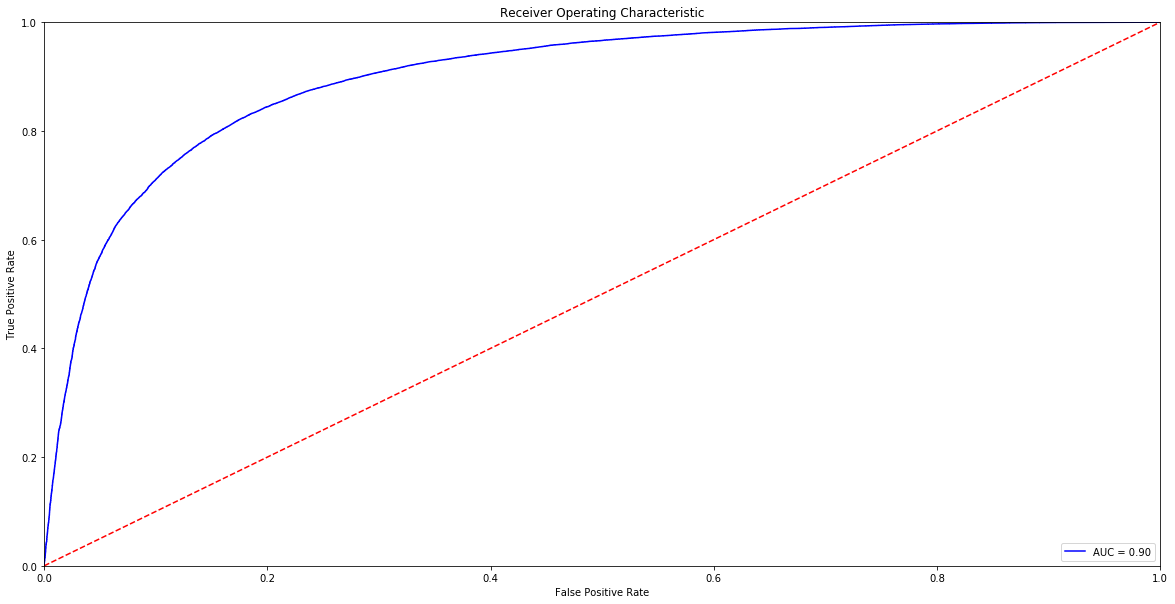

In [116]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

probs = gd_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, preds, pos_label=1)

# precision

recall

array([  1.00000000e+00,   9.99971346e-01,   9.99971346e-01, ...,
         5.73082323e-05,   2.86541162e-05,   0.00000000e+00])

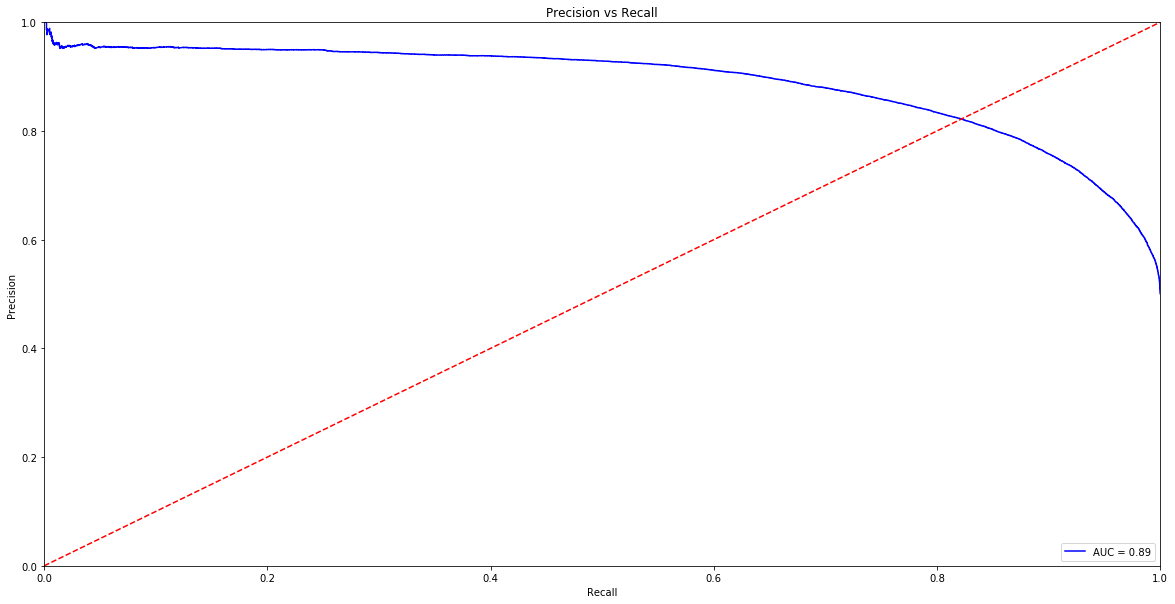

In [122]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(recall, precision)

plt.title('Precision vs Recall')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()